## Load dataset and train classifier

In [1]:
import time
import warnings
import numpy as np
warnings.filterwarnings('ignore')
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
%load_ext autoreload
%autoreload 2

In [2]:
from intabs.dataset import InnDataSet
data_name = "adult"
dataset = InnDataSet(data_name)

Using TensorFlow backend.


[INFO] Using Python-MIP package version 1.12.0 [model.py <module>]
[WARNING] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.
 [lazy_loader.py _load]


In [3]:
from intabs.classifier_binary import cross_validation, train_clf, InnModel
d = dataset
epochs = 15
num_h_neurons=None
cross_validation(d, num_h_neurons=None, epochs=epochs, data_name=data_name, linear=True)

Using cuda device
accuracy: 0.8286299406102806+-0.004261251461360632


In [4]:
torch_model = train_clf(d.X1_train, d.y1_train, d.X1_test, d.y1_test, num_h_neurons, epochs, data_name, save_clf=False, load_clf=False,linear=True)
model = InnModel(d, torch_model, num_h_neurons)

Evaluations on training data

                  precision    recall  f1-score   support

 bad credit (0)      0.854     0.937     0.894     14854
good credit (1)      0.712     0.493     0.582      4678

       accuracy                          0.831     19532
      macro avg      0.783     0.715     0.738     19532
   weighted avg      0.820     0.831     0.819     19532

Evaluations on testing data

                  precision    recall  f1-score   support

 bad credit (0)      0.846     0.935     0.888      3713
good credit (1)      0.689     0.461     0.552      1170

       accuracy                          0.821      4883
      macro avg      0.768     0.698     0.720      4883
   weighted avg      0.809     0.821     0.808      4883



## Experiments 1

First, get $\delta$ value using incremental retraining, and get $\delta$ value using validation set

In [5]:
from intabs.evaluation import get_delta_incremental_training, get_retrained_models_and_validation_set, test_delta_with_val_set
percentages, delta_magnitudes = get_delta_incremental_training(d, model)
inc_delta = delta_magnitudes[5].round(5) # select the delta value corresponding to retraining on 10% size of original data

100%|██████████| 51/51 [00:44<00:00,  1.16it/s]


In [6]:
model.raw_model.to("cpu")
rt_models, val_set, val_y_set = get_retrained_models_and_validation_set(d, model, num_h_neurons=num_h_neurons, linear=True)

100%|██████████| 5/5 [00:15<00:00,  3.09s/it]


In [7]:
val_delta = 0.04
print(test_delta_with_val_set(d, model, val_delta, val_set, rt_models))

0it [00:00, ?it/s]

Set parameter Username
[INFO] Set parameter Username [intabs.py __init__]
Academic license - for non-commercial use only - expires 2025-02-14
[INFO] Academic license - for non-commercial use only - expires 2025-02-14 [intabs.py __init__]


4017it [00:03, 1018.83it/s]

False


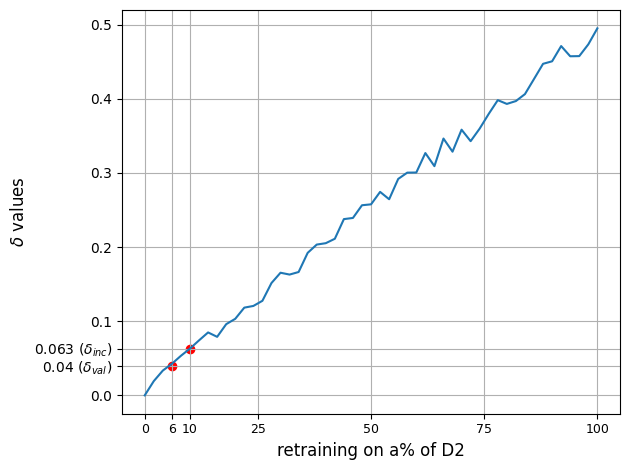

In [8]:
# plot
from intabs.evaluation import plot_deltas
plot_deltas(val_delta, inc_delta, percentages, delta_magnitudes, data_name)

## Experiments 3

Benchmarking CEs

In [9]:
from intabs.evaluation import *
from intabs.methods import run_exps
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
rt_models_eval = get_retrained_models_all(d, model, num_h_neurons=num_h_neurons, epochs=epochs, linear=True)

100%|██████████| 5/5 [00:11<00:00,  2.28s/it]


In [10]:
from intabs.methods import run_exps_all_once_lr
model.raw_model.to("cpu")
model = InnModel(d, torch_model, num_h_neurons)
res_1 = run_exps_all_once_lr(d, model, rt_models_eval, rt_models, inc_delta, val_delta, random_seed=100050,
                               run_id=1)


===== running experiments 1/5 =====
===== running our methods 8-12/17, incremental delta =====


8068it [00:07, 1062.18it/s]
20it [00:00, 61.06it/s]


===== running our methods 13-17/17, validation delta =====


8068it [00:07, 1072.01it/s]
20it [00:00, 63.36it/s]


In [11]:
res_2 = run_exps_all_once_lr(d, model, rt_models_eval, rt_models, inc_delta, val_delta, random_seed=7050,
                               run_id=2)

===== running experiments 2/5 =====
===== running our methods 8-12/17, incremental delta =====


8068it [00:07, 1067.30it/s]
20it [00:00, 51.01it/s]


===== running our methods 13-17/17, validation delta =====


8068it [00:07, 1042.18it/s]
20it [00:00, 55.61it/s]


In [12]:
res_3 = run_exps_all_once_lr(d, model, rt_models_eval, rt_models, inc_delta, val_delta, random_seed=3050,
                               run_id=3)

===== running experiments 3/5 =====
===== running our methods 8-12/17, incremental delta =====


8068it [00:07, 1047.49it/s]
20it [00:00, 48.77it/s]


===== running our methods 13-17/17, validation delta =====


8068it [00:09, 872.11it/s] 
20it [00:00, 53.14it/s]


In [13]:
res_4 = run_exps_all_once_lr(d, model, rt_models_eval, rt_models, inc_delta, val_delta, random_seed=3990,
                               run_id=4)

===== running experiments 4/5 =====
===== running our methods 8-12/17, incremental delta =====


8068it [00:07, 1089.63it/s]
20it [00:00, 56.08it/s]


===== running our methods 13-17/17, validation delta =====


8068it [00:07, 1086.09it/s]
20it [00:00, 57.04it/s]


In [14]:
res_5 = run_exps_all_once_lr(d, model, rt_models_eval, rt_models, inc_delta, val_delta, random_seed=6666,
                               run_id=5)

===== running experiments 5/5 =====
===== running our methods 8-12/17, incremental delta =====


8068it [00:07, 1107.89it/s]
20it [00:00, 51.78it/s]


===== running our methods 13-17/17, validation delta =====


8068it [00:07, 1088.16it/s]
20it [00:00, 55.62it/s]


In [15]:
from intabs.methods import run_exps_lr
mean_res, std_res = run_exps_lr(res_1, res_2, res_3, res_4, res_5)

average results
+--------------+------------+--------+-------+-------+--------------+--------------+
| name         |   coverage |   cost |   lof |   vm2 |   vdelta-val |   vdelta-inc |
+==============+============+========+=======+=======+==============+==============+
| nnce         |          1 |  0.078 | 1.99  | 0.979 |         0.45 |         0.42 |
| roar         |          1 |  0.265 | 1.688 | 1     |         1    |         1    |
| rnce         |          1 |  0.087 | 2.176 | 1     |         1    |         1    |
| rnce-opt     |          1 |  0.064 | 1.738 | 1     |         1    |         1    |
| rnce-val     |          1 |  0.085 | 2.205 | 1     |         1    |         0.7  |
| rnce-opt-val |          1 |  0.06  | 1.712 | 1     |         1    |         0.16 |
+--------------+------------+--------+-------+-------+--------------+--------------+
std results
+--------------+------------+---------+---------+---------+--------------+--------------+
| name         |   coverage |   

In [16]:
mean_res, std_res = run_exps_lr(res_1, res_1, res_1, res_1, res_1)

average results
+--------------+------------+--------+-------+-------+--------------+--------------+
| name         |   coverage |   cost |   lof |   vm2 |   vdelta-val |   vdelta-inc |
+==============+============+========+=======+=======+==============+==============+
| nnce         |          1 |  0.106 | 2.318 | 0.997 |          0.7 |         0.7  |
| roar         |          1 |  0.311 | 1.359 | 1     |          1   |         1    |
| rnce         |          1 |  0.113 | 2.533 | 1     |          1   |         1    |
| rnce-opt     |          1 |  0.078 | 1.813 | 1     |          1   |         1    |
| rnce-val     |          1 |  0.112 | 2.581 | 1     |          1   |         0.9  |
| rnce-opt-val |          1 |  0.074 | 1.804 | 1     |          1   |         0.25 |
+--------------+------------+--------+-------+-------+--------------+--------------+
std results
+--------------+------------+--------+-------+-------+--------------+--------------+
| name         |   coverage |   cost 

In [9]:
import numpy as np
def softmax(inputs):
    return np.exp(inputs)/sum(np.exp(inputs))

softmax([1.4, 0.82, -1.4])

array([0.61701413, 0.3454652 , 0.03752067])